### Imports & Options

In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import re

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

import umap
from sklearn.decomposition import PCA, NMF, LatentDirichletAllocation, TruncatedSVD

In [29]:
from topic_modeler import TFIDF_Topic_Modeler

### Data

In [3]:
filepath = "data/hardie+siding.csv"
df = pd.read_csv(filepath)

### TFIDF

In [36]:
tfidf = TFIDF_Topic_Modeler()
vectors = tfidf.vectorize(df)

In [37]:
vectors

<252x3686 sparse matrix of type '<class 'numpy.float64'>'
	with 12633 stored elements in Compressed Sparse Row format>

In [45]:
reducer = umap.UMAP()
umap_reduction = reducer.fit_transform(vectors)
umap_reduction.shape

(252, 2)

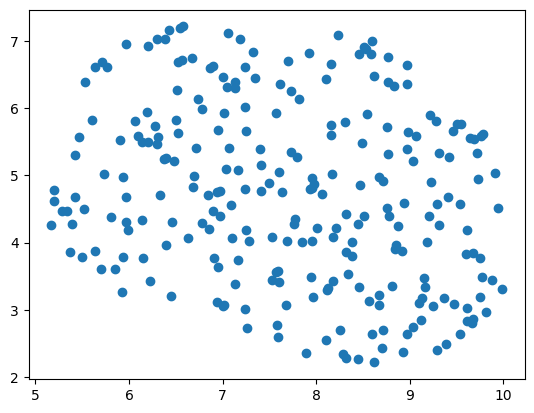

In [46]:
x = umap_reduction[:,0]
y = umap_reduction[:,1]
plt.scatter(x, y)

In [73]:
n_components = 10
nmf = NMF(n_components=n_components)
nmf_reduction = nmf.fit_transform(vectors)

In [71]:
n_components = 10
svd = TruncatedSVD(n_components=n_components)
svd_reduction = svd.fit_transform(vectors)

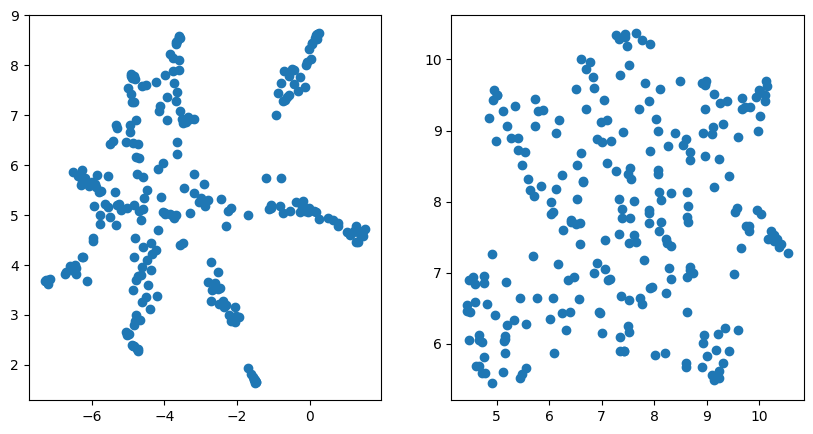

In [74]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

# NMF
nmf_umap_reducer = umap.UMAP()
nmf_umap_reduction = nmf_umap_reducer.fit_transform(nmf_reduction)

ax[0].scatter(
    nmf_umap_reduction[:,0],
    nmf_umap_reduction[:,1],
)

# SVD
svd_umap_reducer = umap.UMAP()
svd_umap_reduction = svd_umap_reducer.fit_transform(svd_reduction)

ax[1].scatter(
    svd_umap_reduction[:,0],
    svd_umap_reduction[:,1],
)

plt.savefig("tf-idf-topic-clusters.png", dpi=200)